# Dependencias

In [99]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

# Dataset

In [54]:
data = pd.read_csv("./empleos_bsas_202303300007.csv")

In [55]:
data.head()

,fecha,departamento,provincia,clase,puestos
0,2014-01-01,CABA,CABA,"Agricultura, ganadería, caza y servicios relac...",5443
1,2014-01-01,CABA,CABA,Silvicultura y explotación forestal,119
2,2014-01-01,CABA,CABA,Pesca y acuicultura,581
3,2014-01-01,CABA,CABA,Extracción de carbón y lignito,24
4,2014-01-01,CABA,CABA,Extracción de petróleo crudo y gas natural,4145


In [58]:
# cambiamos el campo fecha de str a datetime
data["fecha"] = data.fecha.apply(lambda x: datetime.strptime(x, '%Y-%m-%d').date())

# EDA

In [83]:
fecha14 = datetime.strptime('2015-01-01', "%Y-%m-%d").date()
data14 = data.loc[(data['fecha'] < fecha14)]

In [92]:
data14["puestos2"] = data14.puestos.shift()

/tmp/ipykernel_5096/289792878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data14["puestos2"] = data14.puestos.shift()


In [104]:
data14["delta"] = data14.puestos - data14.puestos2 

In [100]:
data14.fillna(0, inplace = True)

In [115]:
dfagrupado = data14.groupby(by=["fecha","provincia"]).sum().delta.reset_index()

In [116]:
dfagrupado

,fecha,provincia,delta
0,2014-01-01,Buenos Aires,-479.0
1,2014-01-01,CABA,1793.0
2,2014-02-01,Buenos Aires,-514.0
3,2014-02-01,CABA,-113.0
4,2014-03-01,Buenos Aires,-318.0
5,2014-03-01,CABA,-35.0
6,2014-04-01,Buenos Aires,20.0
7,2014-04-01,CABA,-64.0
8,2014-05-01,Buenos Aires,-802.0
9,2014-05-01,CABA,-88.0


In [120]:
data.loc[data.provincia == "CABA"].groupby(by=["fecha","provincia"]).sum().reset_index()

,fecha,provincia,puestos
0,2014-01-01,CABA,1146412
1,2014-02-01,CABA,1147371
2,2014-03-01,CABA,1149616
3,2014-04-01,CABA,1148638
4,2014-05-01,CABA,1150599
...,...,...,...
103,2022-08-01,CABA,1158224
104,2022-09-01,CABA,1158977
105,2022-10-01,CABA,1160053
106,2022-11-01,CABA,1160201


<BarContainer object of 12 artists>

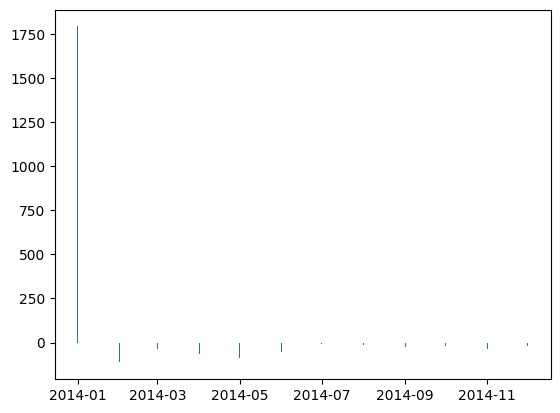

In [117]:
plt.bar(dfagrupado.loc[dfagrupado.provincia == "CABA"].fecha, dfagrupado.loc[dfagrupado.provincia == "CABA"].delta)

# Feature engineering